In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format = 'retina'
from matplotlib.pyplot import figure

In [76]:
df = pd.read_pickle('nyc-2017-yellow-taxi-trips-to-airport-expanded.pkl.gz')

In [77]:
df.shape

(2509468, 13)

In [85]:
df[df.dropoff_datetime < df.pickup_datetime].head()

,pickup_datetime,dropoff_datetime,trip_distance,pickup_borough,pickup_zone,pickup_service_zone,dropoff_zone,dropoff_month,drop_off_week_of_year,dropoff_day_of_year,dropoff_day_of_month,dropoff_hour,trip_duration_minutes


In [79]:
df.shape

(2509468, 13)

In [89]:
df['trip_duration_hours'] = df.trip_duration_minutes/60
df['trip_velocity'] = df.trip_distance / df.trip_duration_hours

In [90]:
df_mh_ewr = df.query("pickup_zone == 'Murray Hill' and dropoff_zone == 'Newark Airport'")

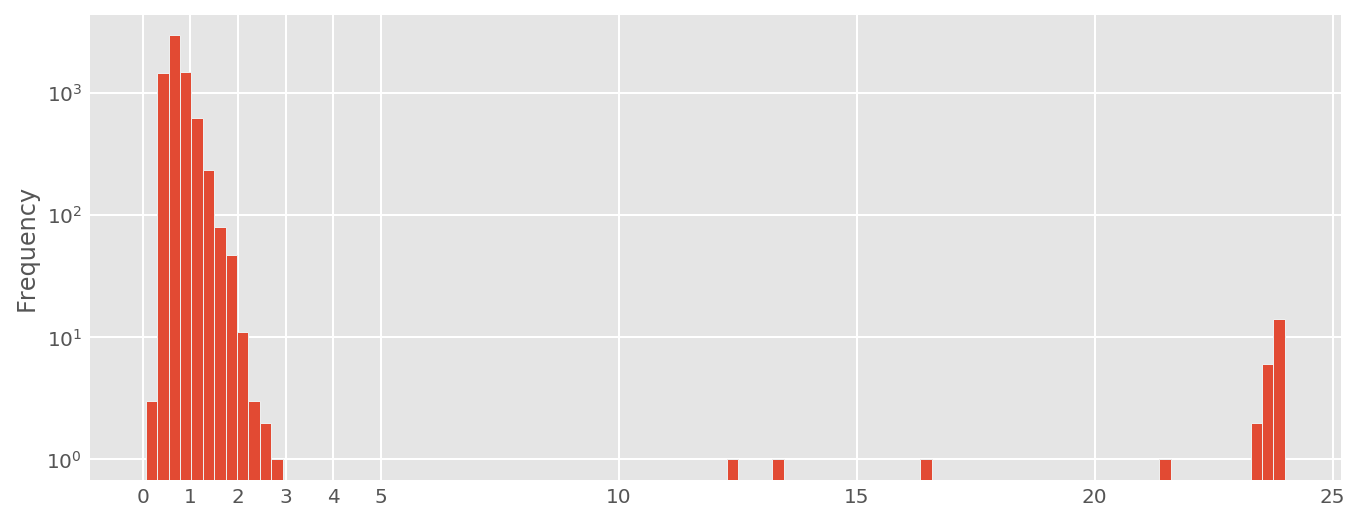

In [187]:
figure(figsize=(10,4))
df_mh_ewr.trip_duration_hours.plot.hist(bins=100)
plt.yscale('log')
#plt.xticks(range(0,26));
plt.xticks([0,1,2,3,4,5,10,15,20,25]);
#plt.xscale('log')

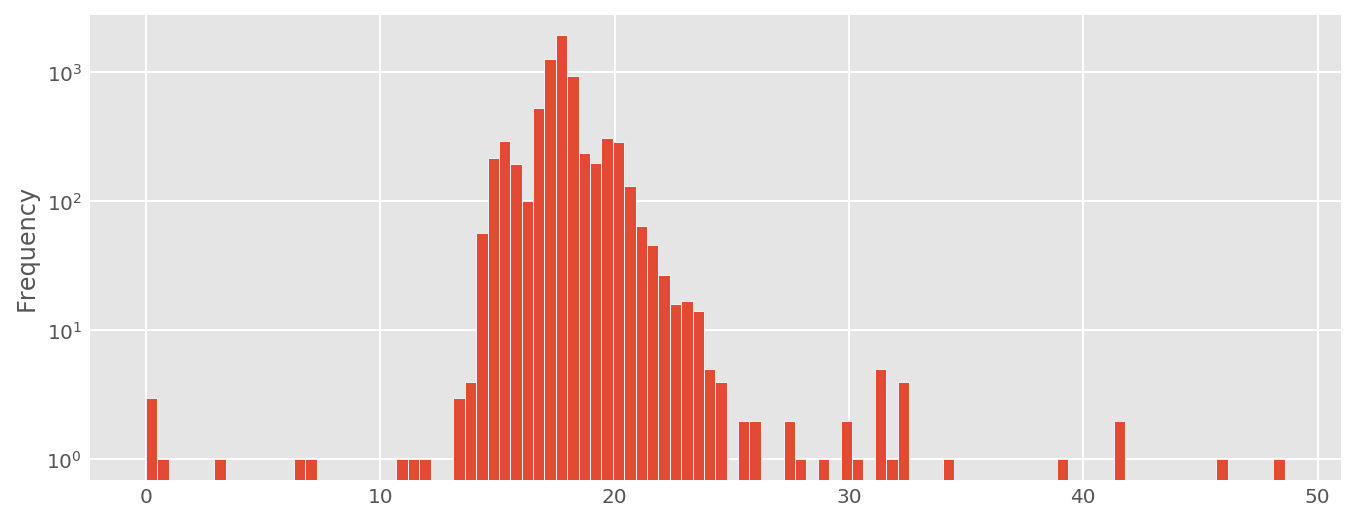

In [188]:
figure(figsize=(10,4))
(df_mh_ewr.trip_distance).plot.hist(bins=100)
plt.yscale('log')
#plt.xticks(range(0,26));
#plt.xticks([0,1,2,3,4,5,10,15,20,25]);
#plt.xscale('log')

In [189]:
df_mh_ewr_fr[df_mh_ewr_fr.trip_duration_hours>20].trip_distance

30375564    19.60
51928749    17.19
58158639    18.20
71814001    17.99
Name: trip_distance, dtype: float64

In [104]:
df_mh_ewr[df_mh_ewr.trip_velocity > 90]

,pickup_datetime,dropoff_datetime,trip_distance,pickup_borough,pickup_zone,pickup_service_zone,dropoff_zone,dropoff_month,drop_off_week_of_year,dropoff_day_of_year,dropoff_day_of_month,dropoff_hour,trip_duration_minutes,trip_duration_hours,trip_velocity
14493990,2017-05-17 15:47:36,2017-05-17 15:57:31,20.51,Manhattan,Murray Hill,Yellow Zone,Newark Airport,5,20,137,17,15,9.916667,0.165278,124.094118
60205282,2017-10-11 11:54:18,2017-10-11 11:58:02,17.47,Manhattan,Murray Hill,Yellow Zone,Newark Airport,10,41,284,11,11,3.733333,0.062222,280.767857
78546674,2017-12-08 14:08:57,2017-12-08 14:16:10,11.17,Manhattan,Murray Hill,Yellow Zone,Newark Airport,12,49,342,8,14,7.216667,0.120278,92.868360


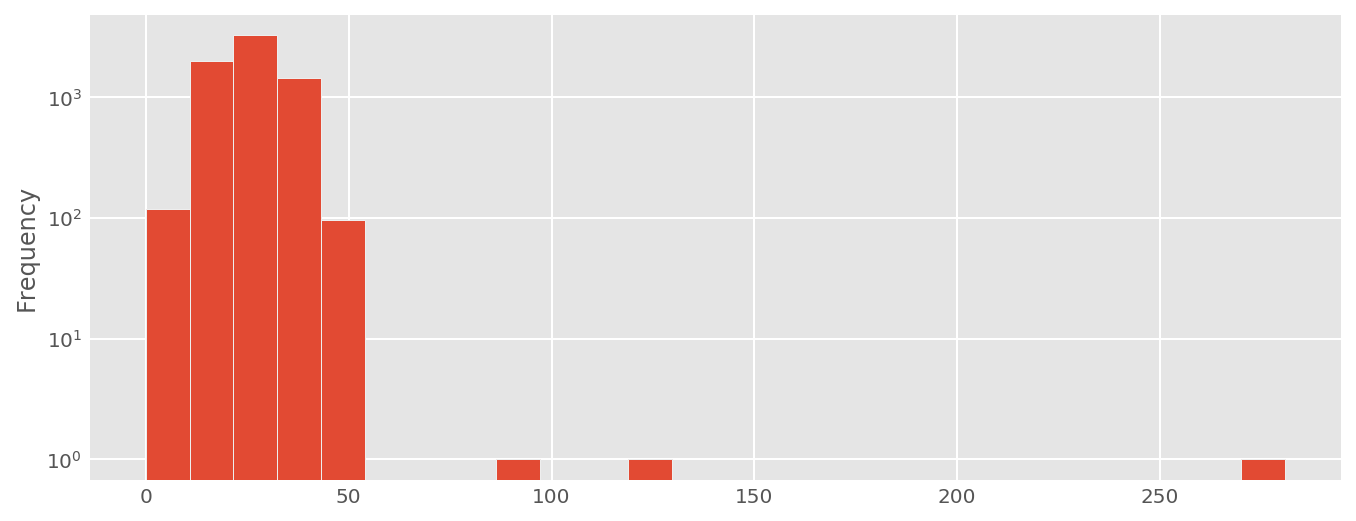

In [99]:
figure(figsize=(10,4))
df_mh_ewr.trip_velocity.plot.hist(bins=26)
plt.yscale('log')
#plt.xticks(range(0,26));
#plt.xticks([0,1,2,3,4,5,10,15,20,25]);
#plt.xscale('log')

(12, 35)

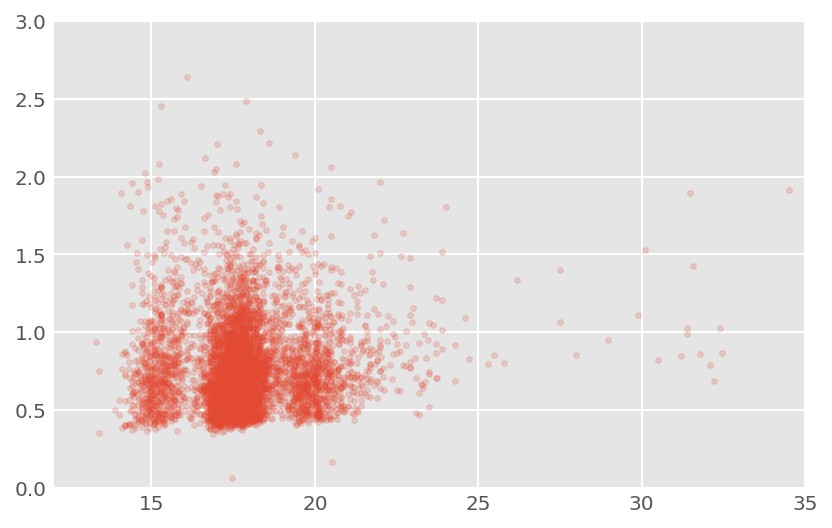

In [128]:
plt.scatter(x=df_mh_ewr.trip_distance, y=df_mh_ewr.trip_duration_hours, alpha=0.2, s=8)
plt.ylim((0,3))
plt.xlim((12,35))

(22, 26)

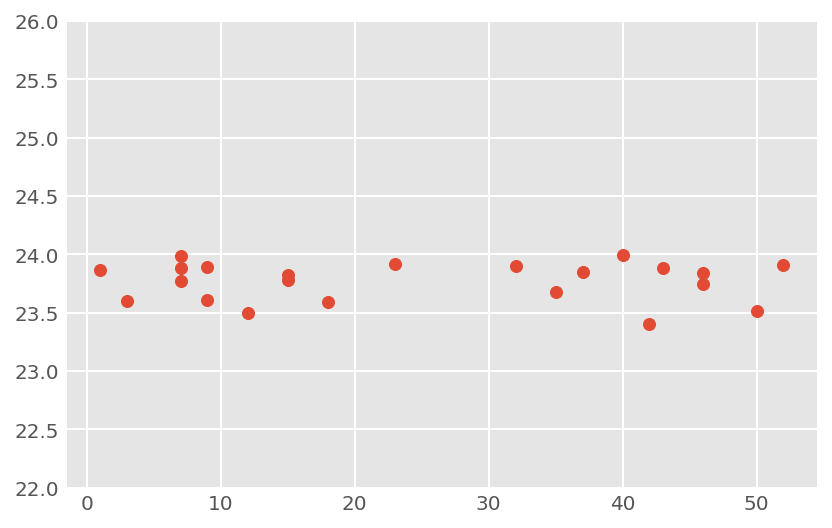

In [138]:
plt.scatter(x=df_mh_ewr.dropoff_datetime.dt.weekofyear, y=df_mh_ewr.trip_duration_hours)
plt.ylim((22,26))

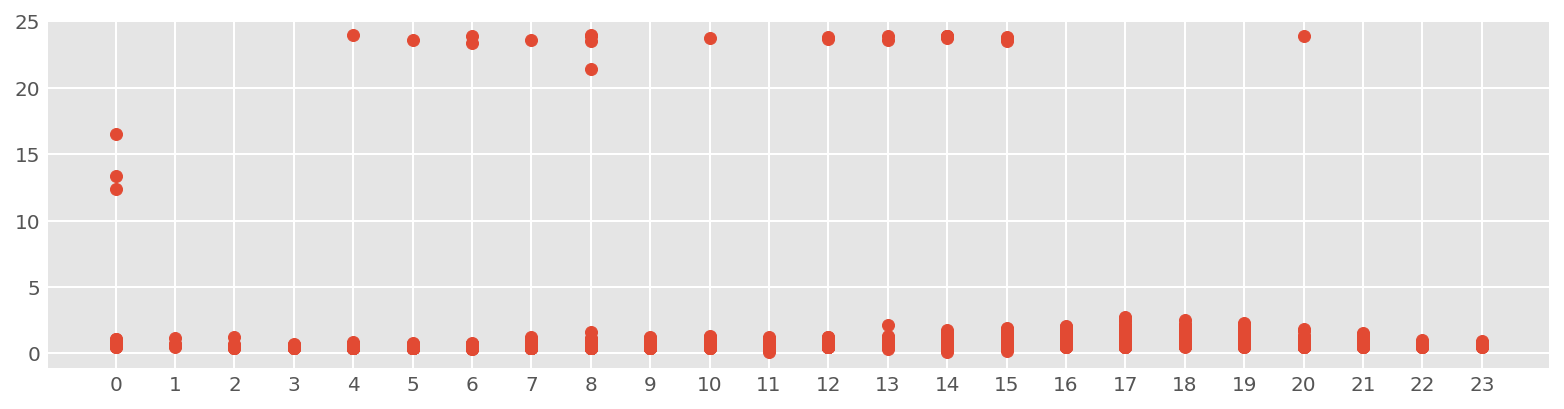

In [181]:
figure(figsize=(12,3))
plt.scatter(x=df_mh_ewr.dropoff_datetime.dt.hour, y=df_mh_ewr.trip_duration_hours)
#plt.ylim((0,180))
plt.xticks(range(0,24));

In [207]:
df_mh_ewr[df_mh_ewr.trip_velocity<1].trip_duration_hours

10212883     23.825556
10603652     23.781944
11209320     23.591667
21112736      0.989167
27757775      0.944444
30375564     23.914722
42817197     23.901111
47060438     23.673889
51530016     21.382500
51928749     23.852500
58158639     23.992222
61395899     23.404722
65315030     23.883611
70803458     23.747222
71814001     23.838611
76182223      2.159444
79159858     23.516944
84342249     23.906944
84348555      1.213333
85607125     23.867500
92027176     23.600556
98529369     23.880278
98626450     23.984167
100012264    23.773611
103540210    23.608056
104118906    23.892222
111302509    23.493056
Name: trip_duration_hours, dtype: float64

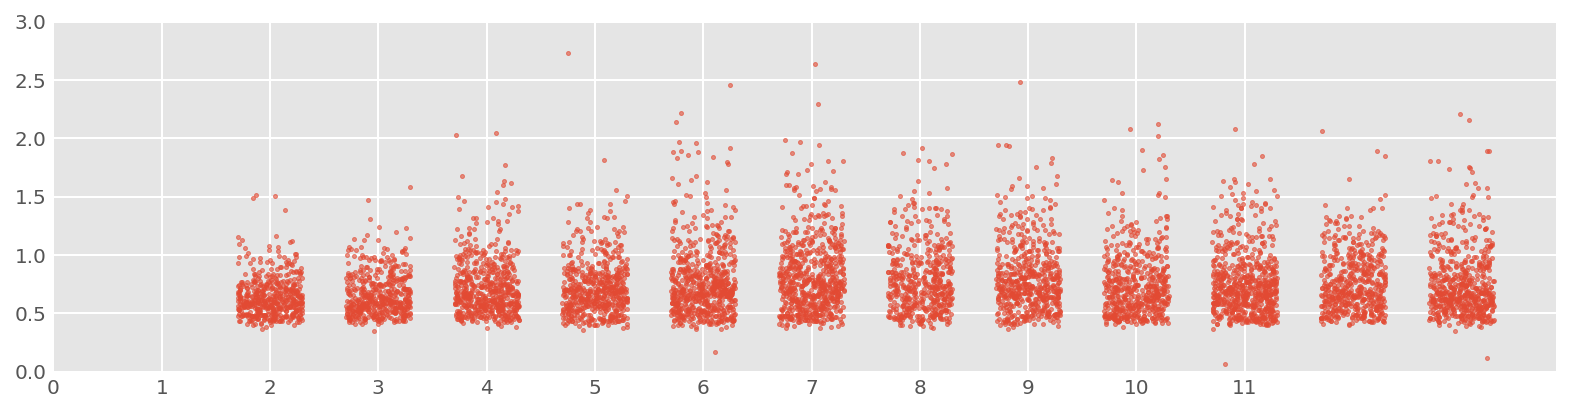

In [247]:
import random
def displace(xs, delta):
    a = xs.min() - delta
    b = xs.min() + delta
    return [x + random.uniform(a,b) for x in xs]
figure(figsize=(12,3))
plt.scatter(x=displace(df_mh_ewr.dropoff_datetime.dt.month, .3), y=df_mh_ewr.trip_duration_hours, alpha=0.6, s=4)
plt.ylim((0,3))
plt.xticks(range(0,12));

(0, 3)

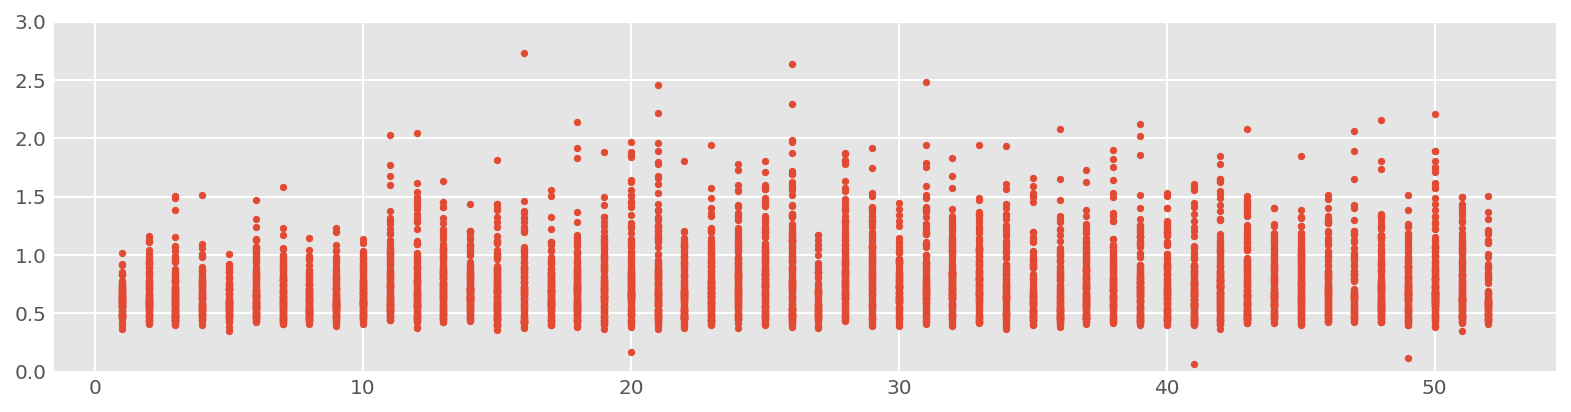

In [252]:
figure(figsize=(12,3))
plt.scatter(x=df_mh_ewr.dropoff_datetime.dt.weekofyear, y=df_mh_ewr.trip_duration_hours, s=10)
plt.ylim((0,3))
#plt.xticks(range(0,2));

In [224]:
(df_mh_ewr.trip_duration_minutes > 180).mean()*100

0.37545126353790614

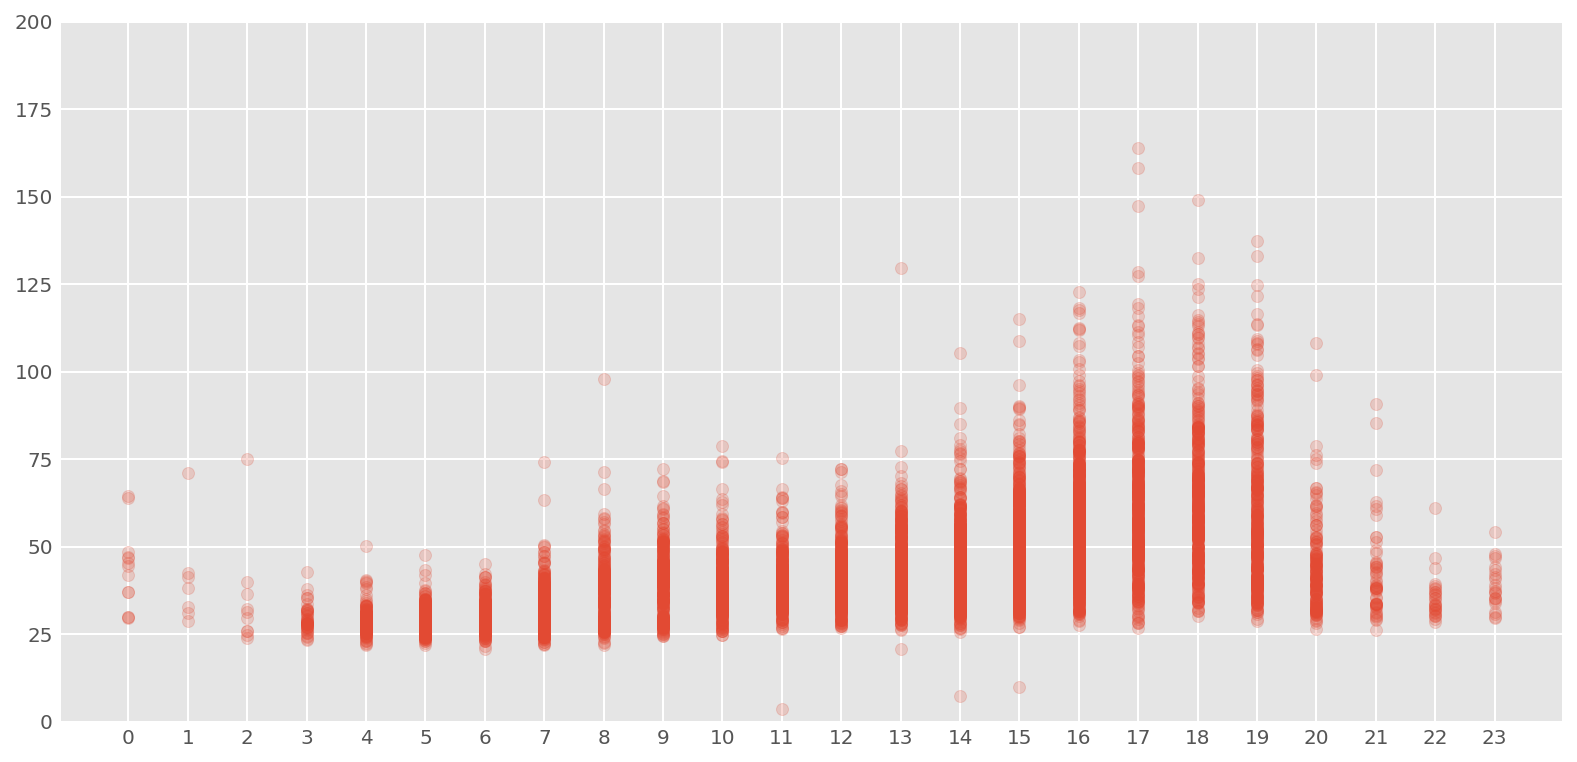

In [253]:
figure(figsize=(12,6))
plt.scatter(x=df_mh_ewr.dropoff_datetime.dt.hour, y=df_mh_ewr.trip_duration_minutes, alpha=.2)
plt.ylim((0,200))
plt.xticks(range(0,24));

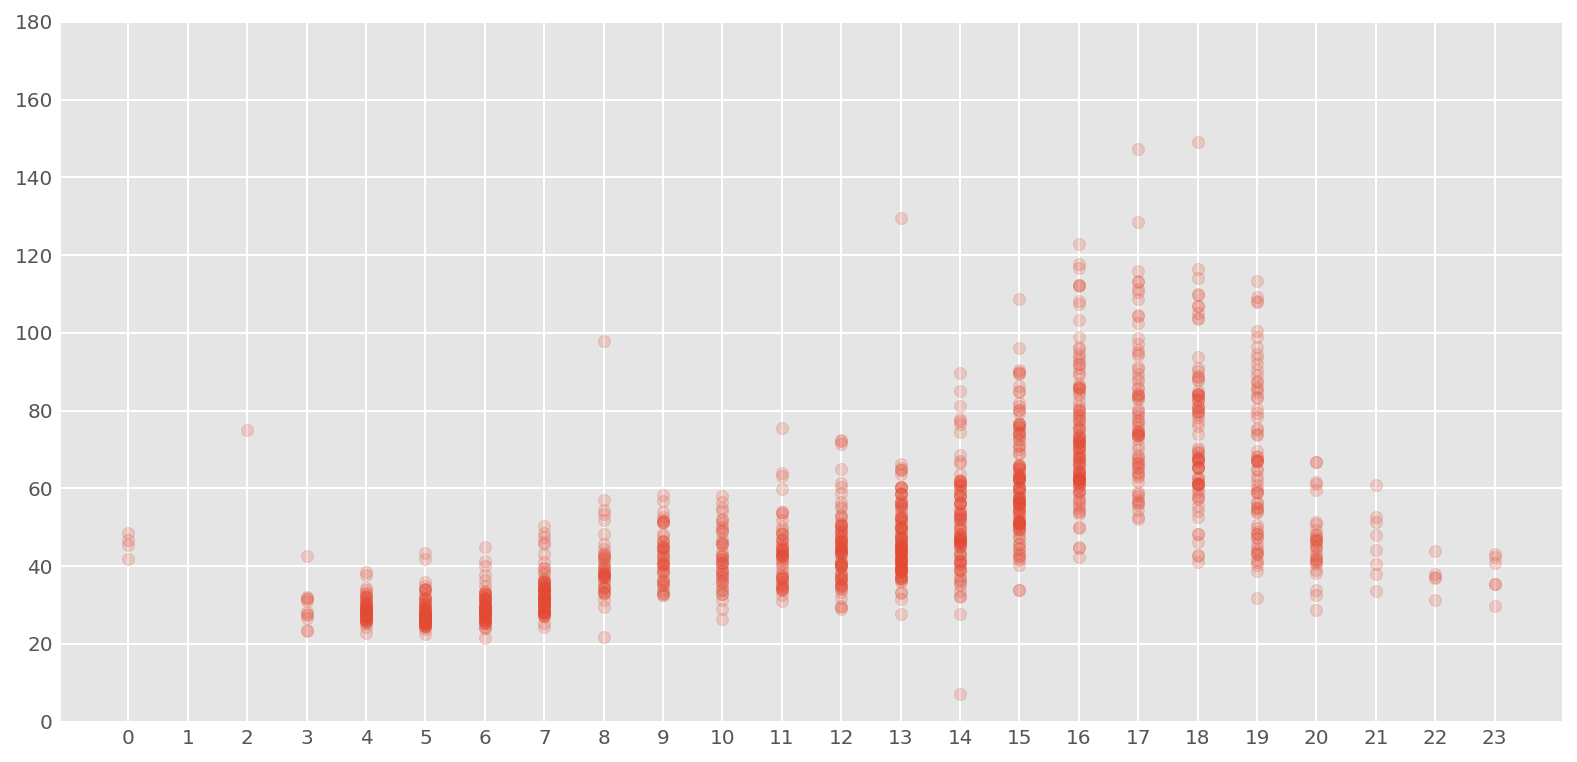

In [273]:
figure(figsize=(12,6))
df_mh_ewr_fr=df_mh_ewr[df_mh_ewr.dropoff_datetime.dt.dayofweek == 4]
plt.scatter(x=df_mh_ewr_fr.dropoff_datetime.dt.hour, y=df_mh_ewr_fr.trip_duration_minutes, alpha=0.2)
plt.ylim((0,180))
plt.xticks(range(0,24));

In [281]:
df_mh_ewr.dropoff_datetime.dt.dayofweek

3714         1
4574         1
27891        1
29086        1
41767        1
52653        1
116185       1
215260       2
215294       2
220203       2
221214       2
226868       2
310026       2
310426       2
347616       2
370996       2
373254       2
373482       2
376963       2
378071       2
378346       2
387931       2
389615       2
401117       2
401385       2
403000       2
408706       2
434495       2
442413       2
515227       2
            ..
113036523    0
113037418    0
113050889    0
113051420    3
113057618    3
113087914    0
113105644    0
113182215    0
113185036    0
113186596    0
113189887    0
113191730    0
113199806    0
113224254    0
113336273    1
113341379    1
113341609    1
113342529    1
113349318    1
113355227    1
113366214    1
113389718    3
113404896    1
113474912    1
113475531    1
113476277    1
113479661    1
113483768    1
113483986    1
113490030    1
Name: dropoff_datetime, Length: 6925, dtype: int64

(0, 180)

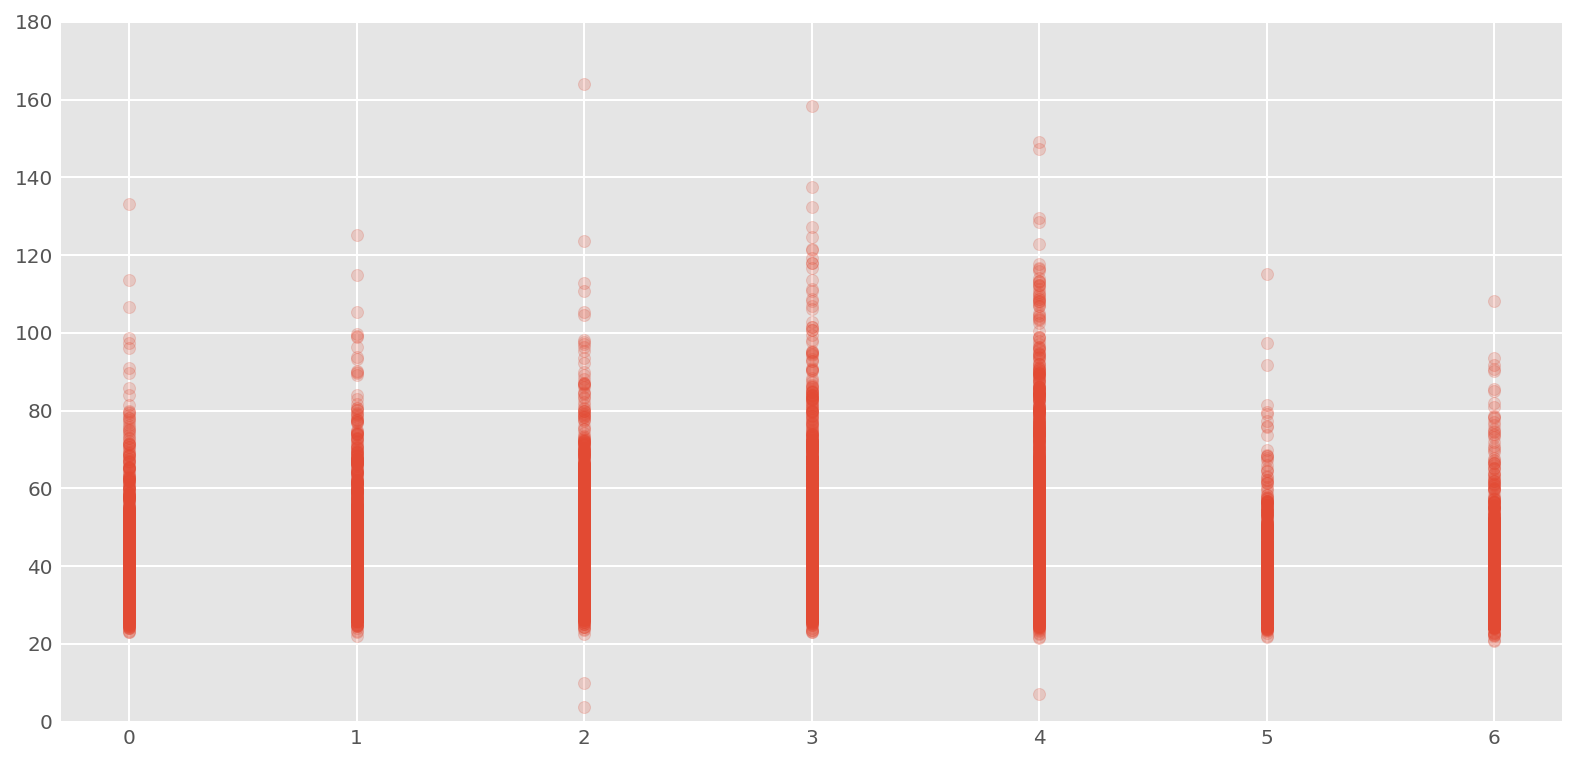

In [282]:
figure(figsize=(12,6))
plt.scatter(x=df_mh_ewr.dropoff_datetime.dt.dayofweek, y=df_mh_ewr.trip_duration_minutes, alpha=0.2)
plt.ylim((0,180))
#plt.xticks(range(0,24));

In [269]:
df_mh_ewr_fr.dropoff_datetime.dt.strftime("%H:%M"

869837       05:56
876778       07:01
877110       07:06
881520       08:34
894260       08:41
920864       09:56
922165       10:00
932610       10:29
937084       10:40
971095       12:35
1000287      14:14
1002574      14:33
1008287      14:32
1012209      14:53
1017773      15:28
1030657      16:14
1031488      16:04
1038060      16:26
1059011      17:55
1063257      17:57
1074824      18:42
1078925      19:12
1079849      19:12
1115928      20:22
1189064      23:27
3293519      04:03
3295609      04:43
3301583      06:38
3306135      07:05
3311255      07:37
             ...  
112552446    04:45
112552954    04:55
112554104    05:09
112554798    05:32
112556916    06:07
112558634    06:29
112558906    06:36
112565971    07:23
112569698    07:45
112597478    09:43
112617212    10:49
112635040    11:57
112640781    12:19
112651078    13:15
112661661    13:52
112666439    13:53
112667561    14:03
112686905    15:40
112691982    15:47
112692798    16:46
112694795    15:46
112706904   

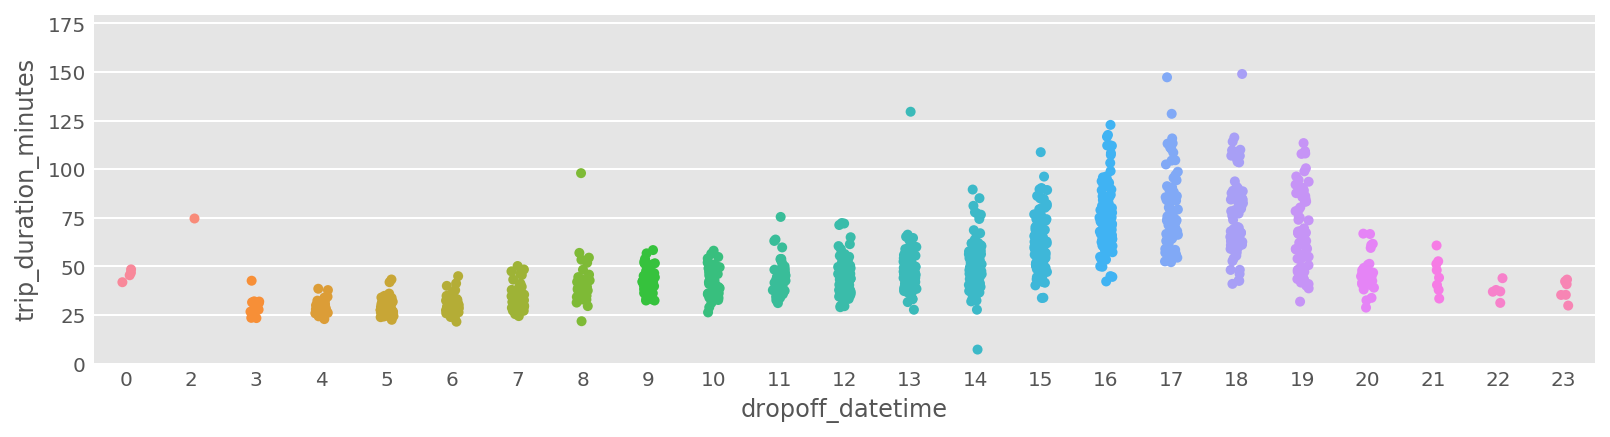

In [179]:

figure(figsize=(12,3))
#df_mh_ewr_fr=df_mh_ewr[df_mh_ewr.dropoff_datetime.dt.dayofweek == 4]
sns.stripplot(x=df_mh_ewr_fr.dropoff_datetime.dt.hour, y=df_mh_ewr_fr.trip_duration_minutes)
plt.ylim((0,180));
#plt.xlim((14,19))
#plt.xticks(range(15,19));

In [74]:
#style.use('Solarize_Light2')
#style.use('bmh')
#style.use('classic')
#style.use('dark_background')
#style.use('fast')
style.use('ggplot')
#style.use('grayscale')
#style.use('seaborn-bright')
#style.use('seaborn-colorblind')
#style.use('seaborn-dark-palette')
#style.use('seaborn-dark')
#style.use('seaborn-darkgrid')
#style.use('seaborn-deep')
#style.use('seaborn-muted')
#style.use('seaborn-notebook')
#style.use('seaborn-paper')
#style.use('seaborn-pastel')
#style.use('seaborn-poster')
#style.use('seaborn-talk')
#style.use('seaborn-ticks')
#style.use('seaborn-white')
#style.use('seaborn-whitegrid')
#style.use('seaborn')
#style.use('tableau-colorblind10')
#style.use('fivethirtyeight')

Text(0.5, 0, 'Trip Duration in Minutes')

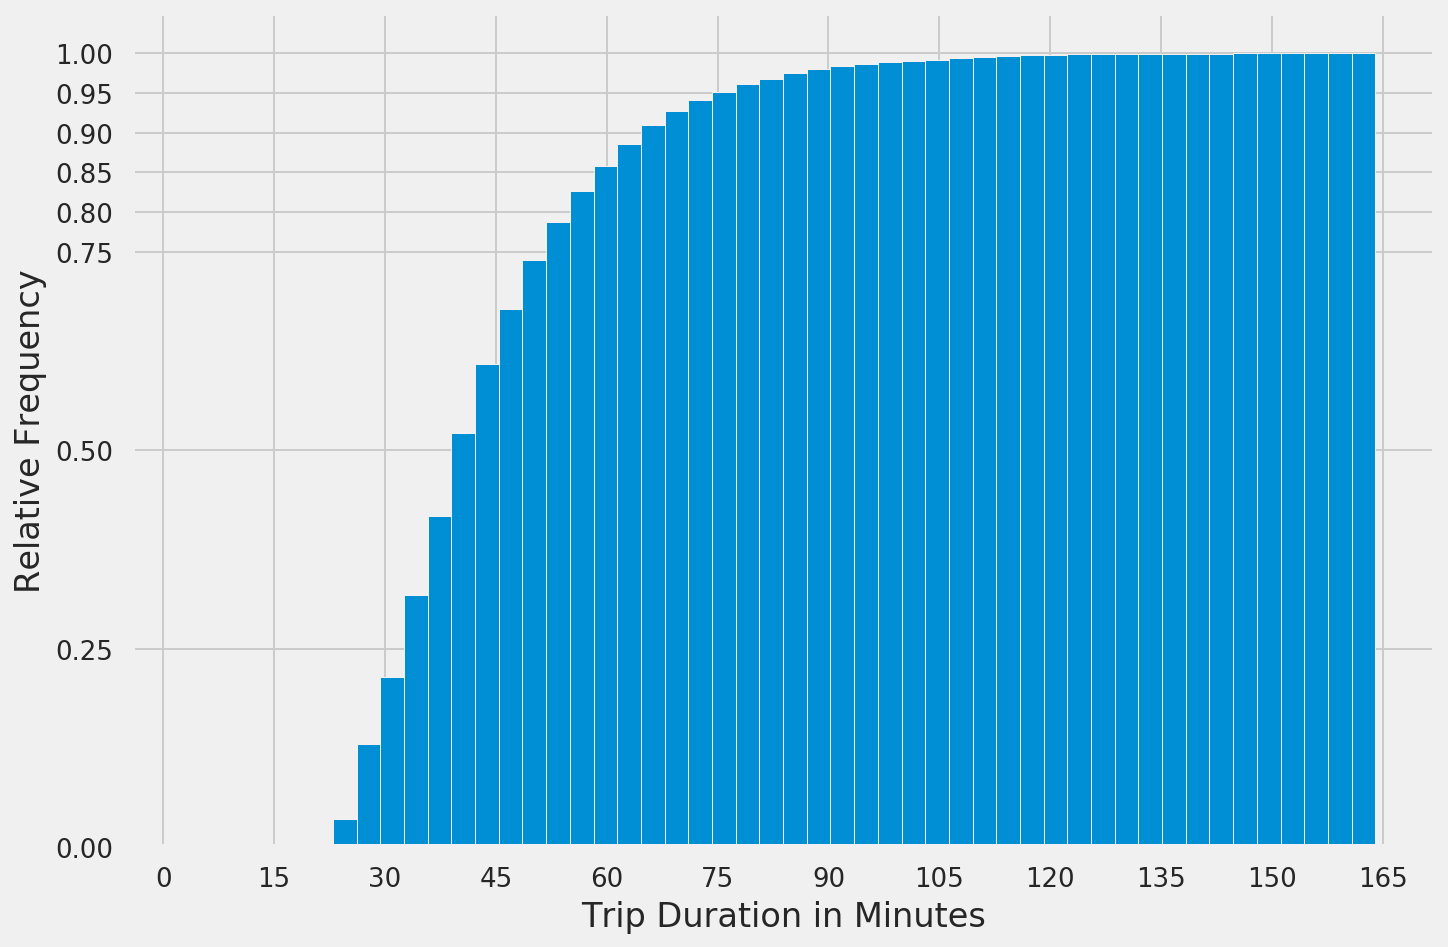

In [214]:
df3.duration_mins.hist(bins=50, cumulative=True, density=1)
plt.yticks([0.0, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]);
plt.xticks(range(0, 180, 15))
plt.ylabel('Relative Frequency')
plt.xlabel('Trip Duration in Minutes')


In [173]:
style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']